## Personal Key Indicators of Heart Disease, an analysis

Heart disease is a leading cause of death in countries around the world. 

Research shows a number of comorbidities contribute to the risk of developing disease at all ages. 

Being able to predict the prevalence of heart disease will allow us to identify patients sooner and continue evolving from reactive medicine towards proactive intervention.

*Using this dataset, how accurately can we predict the prevalence of heart disease?*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import os
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from dython.nominal import associations, numerical_encoding, cluster_correlations
from dython.data_utils import split_hist

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
sns.set_theme(style='whitegrid', palette='pastel')

In [3]:
data = pd.read_csv('../Capstone-Two/heartPHI2020.csv')
df = data.copy()
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Dataset and column descriptions:

Kaggle Dataset at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Adapted by the creator from the 2020 annual CDC BRFSS survey data of 400k adults related to their health status to include heart disease indicators. 

**Column Details:**

*HeartDisease:* Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). *(Yes / No)*

*BMI:* Body Mass Index (BMI) *(BMI=kg/(m^2))*

*Smoking:* Have you smoked at least 100 ciagrettes in your entire life? [Note: 1 pack = ~25 cigarettes] *(Yes / No)*

*AlcoholDrinking:* Heavy drinker? (Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) *(Yes / No)*

*Stroke:* Have you ever been told you had a stroke? *(Yes / No)*

*PhysicalHealth:* How many days during the past 30 days was your physical health not good? (Including physical illness or injury.) *(0-30 days)*

*MentalHealth:* How many days during the past 30 days was your mental health not good? (Includes stress, depression, and problems with emotions.) *(0-30 days)*

*DiffWalking:* Do you have serious difficulty walking or climbing stairs? *(Yes / No)*

*Sex:* Are you Female or Male? *('Male', 'Female')*

*AgeCategory:* thirteen age categories. *('18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older')*

*Race:* Which one of these groups best represents your race? *('White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic', 'Other')*

*Diabetic:* Have you ever been told you have diabetes? *('Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)')*

*PhysicalActivity:* Respondents who reported doing physical activity or exercise during the past 30 days other than their regular job. *(Yes / No)*

*GenHealth:* Would you say that your general health is- *('Poor','Fair','Good','Very good','Excellent')*

*SleepTime:* On average, how many hours of sleep do you get in a 24-hour period? *(0-24)*

*Asthma:* Have you ever been told you had asthma? *(Yes / No)*

*KidneyDisease:* Were you ever told you have kidney disease (Not including kidney stones, bladder infection or incontinence.) *(Yes / No)*

*SkinCancer:* Were you ever told you had skin cancer? *(Yes / No)*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [6]:
df.isna().sum()
# there are no null data

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.HeartDisease.value_counts()
# Far more No responses than Yes for HeartDisease

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Handling imbalanced data

After undersampling: Counter({'No': 27373, 'Yes': 27373})


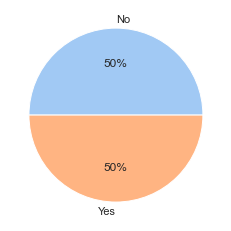

In [8]:
# Oversample and undersample and look at distributions.
# Undersample removes samples randomly from the majority class to make the distribution more equal
# As usual, X is all minus target variable
under_sampler = RandomUnderSampler(sampling_strategy=1, random_state=123)
X = df.iloc[:, 1:]
y = df['HeartDisease']
X_under, y_under = under_sampler.fit_resample(X, y)

# Count classes and create pie chart
print(f'After undersampling: {Counter(y_under)}')
plt.pie(y_under.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

After oversampling: Counter({'No': 292422, 'Yes': 292422})


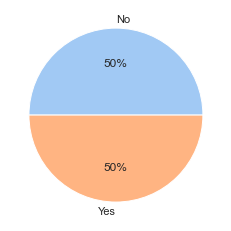

In [9]:
# oversampling randomly chooses and adds in samples from minority class to make distribution more equal
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=123)
X = df.iloc[:, 1:]
y = df['HeartDisease']
X_over, y_over = over_sampler.fit_resample(X, y)

print(f'After oversampling: {Counter(y_over)}')
plt.pie(y_over.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

In [10]:
X_under.describe(include='all')

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,54746.000000,54746,54746,54746,54746.000000,54746.000000,54746,54746,54746,54746,54746,54746,54746,54746.000000,54746,54746,54746
unique,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,NaN,No,No,No,NaN,NaN,No,Male,70-74,White,No,Yes,Good,NaN,No,No,No
freq,NaN,27923,51653,49659,NaN,NaN,41548,28918,7224,43328,41151,38974,17413,NaN,46308,50533,47412
mean,28.792460,NaN,NaN,NaN,5.371223,4.241771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.118164,NaN,NaN,NaN
std,6.470628,NaN,NaN,NaN,9.954864,8.553142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.597540,NaN,NaN,NaN
min,12.210000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,24.390000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,27.710000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,32.010000,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [11]:
X_over.describe(include='all')

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,584844.000000,584844,584844,584844,584844.000000,584844.000000,584844,584844,584844,584844,584844,584844,584844,584844.000000,584844,584844,584844
unique,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,NaN,No,No,No,NaN,NaN,No,Male,70-74,White,No,Yes,Good,NaN,No,No,No
freq,NaN,297855,552085,530072,NaN,NaN,443255,308059,77870,463404,439062,417394,185962,NaN,494002,539414,506541
mean,28.808107,NaN,NaN,NaN,5.390971,4.240462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.115034,NaN,NaN,NaN
std,6.475100,NaN,NaN,NaN,9.969421,8.535121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.603945,NaN,NaN,NaN
min,12.020000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,24.390000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,27.750000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,32.080000,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [12]:
# will move forward with undersampled df and explore oversampled df model performance later
y_under = pd.DataFrame(y_under)
undersampled_df = y_under.merge(X_under, left_index=True, right_index=True)
df = undersampled_df

## Preprocessing

In [13]:
# people with MentalHealth or PhysicalHealth response of 0, 
# responded that they had mental and physical problems 0 out of the last 30 days
df[['SleepTime', 'PhysicalHealth', 'MentalHealth']] = df[['SleepTime', 'PhysicalHealth', 'MentalHealth']].astype(int)

In [14]:
# similar to this study - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4877313/
# will evaluate, BMI PhysicalHealth, MentalHealth, and SleepTime as both continuous and categorical variables
# they used these bins for SleepTime of ≤ 6 h, > 6 to < 9 h, ≥ 9 h
# MentalHealth and PhysicalHealth variables are responses to how many days in last 30-31 were bad for health
# binning them by week
# Underweight: Less than 18.5, Healthy: 18.5 to 24.9, Overweight: 25 to 29.9, Class I obesity: 30 to 34.9, Class II obesity: 35 to 39.9, Class III obesity: More than 40.

sleep_bins = [-np.inf, 5, 7, 9, np.inf]
sleep_labels = ['≤ 5', '> 5 to ≤ 7 h', '> 7 to ≤ 9 h', '> 9 h']
df['SleepTime_binned'] = pd.cut(df['SleepTime'], bins=sleep_bins, labels=sleep_labels)

bmi_bins = [-np.inf, 18.49, 24.9, 29.9, 34.9, 39.9, np.inf]
bmi_labels = ['Underweight','Healthy','Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity']
df['BMI_binned'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

mental_bins = [-np.inf, 7, 14, 21, np.inf]
mental_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['MentalHealth_binned'] = pd.cut(df['MentalHealth'], bins=mental_bins, labels=mental_labels)

physical_bins = [-np.inf, 7, 14, 21, np.inf]
physical_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['PhysicalHealth_binned'] = pd.cut(df['PhysicalHealth'], bins=physical_bins, labels=physical_labels)

re-bin with means?

In [15]:
agecat_mean = {'18-24':21,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,'55-59':57, 
                    '60-64':62,'65-69':67,'70-74':72,'75-79':77,'80 or older':80}

df['Mean_Age'] = df['AgeCategory'].apply(lambda x: agecat_mean[x])
df.drop(columns=['AgeCategory'],inplace=True)

In [16]:
print(f'min BMI: {df["BMI"].min()}')
print(f'max BMI: {df["BMI"].max()}')

min BMI: 12.21
max BMI: 87.05


In [17]:
len(df)

54746

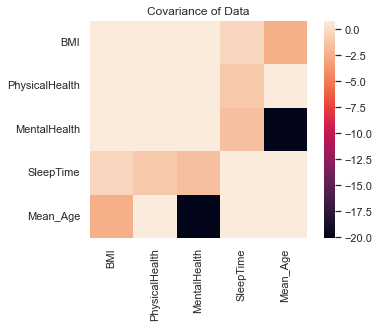

In [18]:
data_covariance = df.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

Encode and standardize the data.

In [19]:
# label encode cols with 2 or less options
lencoder = LabelEncoder()
columns = ['Sex', 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
           'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'PhysicalHealth']
for col in columns:
        df[col] = lencoder.fit_transform(df[col])
# onehot encode variables nunique > 2 -- model accuracies lower with onehot encoded 'AgeCategory'
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', 'SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 
                                 'PhysicalHealth_binned'], prefix=['Race', 'Diabetic', 'GenHealth', 'SleepTime_binned', 
                                                                   'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned'])


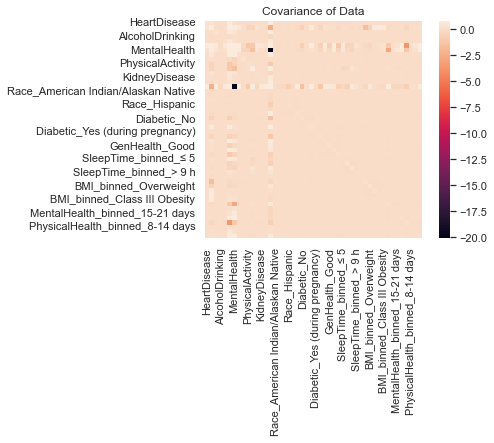

In [20]:
data_covariance = df.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

In [21]:
df_corr = df.corr()['HeartDisease'].abs().sort_values(ascending=False)
df_corr

HeartDisease                           1.000000
Mean_Age                               0.441305
DiffWalking                            0.292866
Diabetic_Yes                           0.264561
Diabetic_No                            0.258449
GenHealth_Excellent                    0.246392
PhysicalHealth                         0.244809
PhysicalHealth_binned_≤ 7 days         0.236571
Stroke                                 0.232228
GenHealth_Fair                         0.217316
GenHealth_Poor                         0.209829
PhysicalHealth_binned_> 21 days        0.200893
Smoking                                0.191870
GenHealth_Very good                    0.191218
KidneyDisease                          0.184841
PhysicalActivity                       0.161174
SkinCancer                             0.140825
Sex                                    0.122945
BMI                                    0.094139
SleepTime_binned_> 5 to ≤ 7 h          0.091700
BMI_binned_Healthy                     0

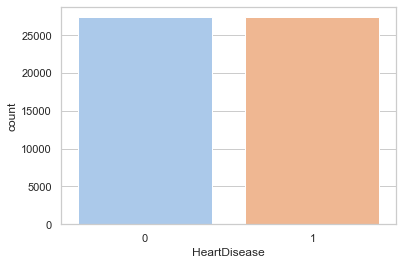

In [22]:
# train_test_split (before scaler)
X = df.iloc[:, 1:]
y = df['HeartDisease']

# confirm balance
sns.countplot(x=y, data=df)
plt.show()

In [23]:
len(X)

54746

In [24]:
# split data into train/test before scaling or tuning to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Outliers

In [25]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

lof = LocalOutlierFactor(p=1, n_jobs=-1)
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers -- -1 is outlier 
mask = yhat != -1
X_train, y_train = X_train.iloc[mask], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(38582, 47) (38582,)


In [26]:
num_removed = len(yhat) - np.count_nonzero(yhat==1)
num_removed

5214

Scaling

In [27]:
# separate numerical columns to be scaled
num_train_df = X_train[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime', 'Mean_Age']]
num_test_df = X_test[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Mean_Age']]

# fit scaler on training data and only transform test data
# scale after train_test_split to avoid causing data leakage
scaler = RobustScaler()

X_train_num = scaler.fit(num_train_df)
X_train_num = scaler.transform(num_train_df)
X_test_num = scaler.transform(num_test_df)

# Add column names and convert to df
col_names = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Mean_Age']
X_train_num = pd.DataFrame(X_train_num, columns=col_names)
X_test_num = pd.DataFrame(X_test_num, columns=col_names)

In [28]:
# merge cat and num dataframes
X_train = X_train.drop(columns=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Mean_Age'])
X_train = X_train.reset_index(drop=True)
X_train = X_train.merge(X_train_num, left_index=True, right_index=True)

X_test = X_test.drop(columns=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Mean_Age'])
X_test = X_test.reset_index(drop=True)
X_test = X_test.merge(X_test_num, left_index=True, right_index=True)

Try featuretools

In [29]:
import featuretools as ft

# create entityset
es = ft.EntitySet(id = 'patients')
# create entity from entityset
es = es.entity_from_dataframe(entity_id = 'patients', dataframe = df, index='index')

dataframe = {'dataframe': df}

feature_matrix_features, features_defs = ft.dfs(entityset = es, target_entity='patients', agg_primitives = ['Skew', 'Entropy'], trans_primitives= ['Percentile'])
feature_matrix_features.head(5)

/opt/homebrew/Caskroom/miniforge/base/envs/FeatureTools/lib/python3.9/site-packages/featuretools/entityset/entity.py:462: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn("index {} not found in dataframe, creating new "
/opt/homebrew/Caskroom/miniforge/base/envs/FeatureTools/lib/python3.9/site-packages/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "
/opt/homebrew/Caskroom/miniforge/base/envs/FeatureTools/lib/python3.9/site-packages/featuretools/synthesis/dfs.py:307: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['Percentile']
  agg_primitives: ['Entropy', 'Skew']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types fo

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,PERCENTILE(Race_White),PERCENTILE(Sex),PERCENTILE(SkinCancer),PERCENTILE(SleepTime),PERCENTILE(SleepTime_binned_> 5 to ≤ 7 h),PERCENTILE(SleepTime_binned_> 7 to ≤ 9 h),PERCENTILE(SleepTime_binned_> 9 h),PERCENTILE(SleepTime_binned_≤ 5),PERCENTILE(Smoking),PERCENTILE(Stroke)
index,,,,,,,,,,,,,,,,,,,,,
0,0,34.87,1,0,0,0,0,0,1,1,...,0.604291,0.735899,0.433027,0.080453,0.262448,0.31943,0.474857,0.943302,0.755032,0.453549
1,0,28.89,0,0,0,0,0,0,1,1,...,0.104291,0.735899,0.433027,0.452544,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549
2,0,25.68,0,0,0,0,0,0,1,1,...,0.604291,0.735899,0.433027,0.214984,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549
3,0,28.08,0,0,0,1,10,0,1,1,...,0.604291,0.735899,0.433027,0.214984,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549
4,0,28.67,0,0,0,30,30,1,0,0,...,0.604291,0.235899,0.433027,0.214984,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549


In [30]:
feature_matrix_features.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Mean_Age', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'SleepTime_binned_≤ 5',
       'SleepTime_binned_> 5 to ≤ 7 h', 'SleepTime_binned_> 7 to ≤ 9 h',
       'SleepTime_binned_> 9 h', 'BMI_binned_Underweight',
       'BMI_binned_Healthy', 'BMI_binned_Overweight',
       'BMI_binned_Class I Obesity', 'BMI_binned_Class II Obesity',
       'BMI_binned_Class III Obesity', 'MentalHealth_binned_≤ 7 days',
       'MentalHealth_binned_8-14 days', 'MentalHealth_binned_15-21 da

In [31]:
df1 = df.copy()
df1 = ft.selection.remove_low_information_features(feature_matrix_features)

In [32]:
df1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,PERCENTILE(Race_White),PERCENTILE(Sex),PERCENTILE(SkinCancer),PERCENTILE(SleepTime),PERCENTILE(SleepTime_binned_> 5 to ≤ 7 h),PERCENTILE(SleepTime_binned_> 7 to ≤ 9 h),PERCENTILE(SleepTime_binned_> 9 h),PERCENTILE(SleepTime_binned_≤ 5),PERCENTILE(Smoking),PERCENTILE(Stroke)
index,,,,,,,,,,,,,,,,,,,,,
0,0,34.87,1,0,0,0,0,0,1,1,...,0.604291,0.735899,0.433027,0.080453,0.262448,0.31943,0.474857,0.943302,0.755032,0.453549
1,0,28.89,0,0,0,0,0,0,1,1,...,0.104291,0.735899,0.433027,0.452544,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549
2,0,25.68,0,0,0,0,0,0,1,1,...,0.604291,0.735899,0.433027,0.214984,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549
3,0,28.08,0,0,0,1,10,0,1,1,...,0.604291,0.735899,0.433027,0.214984,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549
4,0,28.67,0,0,0,30,30,1,0,0,...,0.604291,0.235899,0.433027,0.214984,0.762448,0.31943,0.474857,0.443302,0.255032,0.453549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,1,38.45,0,0,1,30,15,1,0,1,...,0.104291,0.235899,0.433027,0.214984,0.762448,0.31943,0.474857,0.443302,0.255032,0.953549
54742,1,36.21,1,0,0,0,0,1,0,1,...,0.104291,0.235899,0.433027,0.741314,0.262448,0.81943,0.474857,0.443302,0.755032,0.453549
54743,1,37.12,1,0,0,0,0,0,1,1,...,0.104291,0.735899,0.433027,0.452544,0.762448,0.31943,0.474857,0.443302,0.755032,0.453549
